In [173]:
from helper import *
from QPIXL_qiskit.qpixl_parallel import *
from qiskit.visualization import *
from qiskit_aer import StatevectorSimulator
import qiskit
backend = StatevectorSimulator(method="statevector")


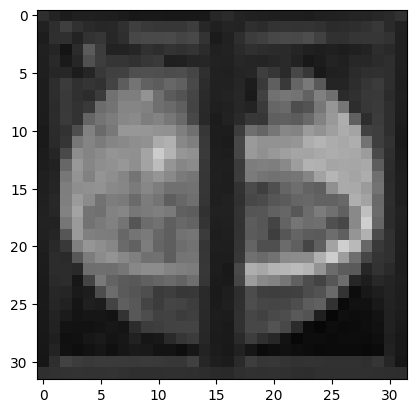

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('figures/creation_world.png')
img = img.resize((32,32), Image.Resampling.LANCZOS)

shape = img.size
np_frame = [np.flip(np.array(img).T.flatten())] #sometimes you have to transpose the image for the decoding to make sense
comp_images = []
labels = []
comp_str = "Compression: "+str(0)+"% \n"
qc = cFRQI(np_frame,0)
# print(qc.draw())
job = backend.run(qc)
depth_str = " Circuit depth: "+str( qc.depth())
#### Just for show
sv = np.real(job.result().get_statevector())
img2 = decodeQPIXL(sv)
comp_images.append(reconstruct_img(img2, shape))
labels.append(comp_str+depth_str)
plt.imshow(img)

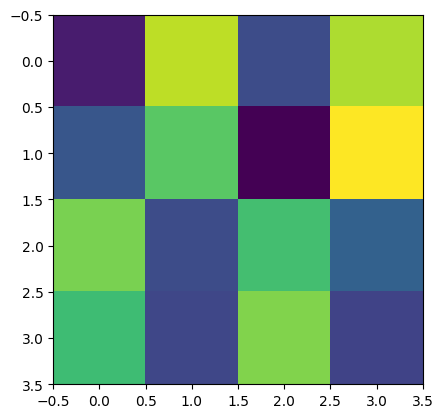

In [166]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('figures/creation_world.png')
img = img.resize((4,4), Image.Resampling.LANCZOS)
shape = img.size
img = np.array(img)[:,:,0]
img2 = np.flip(img,axis=0)
np_frame_hold = [np.array(img).T.flatten(),np.array(img2).T.flatten()]
np_frame = [np.array(img).T.flatten(),np.array(img2).T.flatten()] #sometimes you have to transpose the image for the decoding to make sense
comp_images = []
labels = []
comp_str = "Compression: "+str(0)+"% \n"
qc = cFRQI(np_frame,0)
# print(qc.draw())
job = backend.run(qc)
depth_str = " Circuit depth: "+str( qc.depth())
#### Just for show
sv = np.real(job.result().get_statevector())



decoded = decodeQPIXL(sv)
comp_images.append(reconstruct_img(decoded[1::2], shape))
labels.append(comp_str+depth_str)
plt.imshow(comp_images[0])

In [182]:
traced_over_qubits = [ qc.qubits.index(qubit) for qubit in [qc.qubits[0]] ]
density_matrix = qiskit.quantum_info.partial_trace(sv, traced_over_qubits)


In [185]:
density_matrix

DensityMatrix([[0.03854517+0.j, 0.03038656+0.j, 0.00562676+0.j, ...,
                0.04607471+0.j, 0.04487687+0.j, 0.01858861+0.j],
               [0.03038656+0.j, 0.02395483+0.j, 0.00443578+0.j, ...,
                0.03632237+0.j, 0.03537807+0.j, 0.01465408+0.j],
               [0.00562676+0.j, 0.00443578+0.j, 0.00086344+0.j, ...,
                0.00715513+0.j, 0.00676598+0.j, 0.00280256+0.j],
               ...,
               [0.04607471+0.j, 0.03632237+0.j, 0.00715513+0.j, ...,
                0.05945579+0.j, 0.05583686+0.j, 0.02312839+0.j],
               [0.04487687+0.j, 0.03537807+0.j, 0.00676598+0.j, ...,
                0.05583686+0.j, 0.05334709+0.j, 0.02209709+0.j],
               [0.01858861+0.j, 0.01465408+0.j, 0.00280256+0.j, ...,
                0.02312839+0.j, 0.02209709+0.j, 0.00915291+0.j]],
              dims=(2, 2, 2, 2, 2))


In [149]:
img2.flatten()/img.max()

array([0.91764706, 0.90588235, 1.        , 0.98823529])